
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('C:\\Users\\Admin\\Desktop\\Assignment_Data_vF.xls')

In [3]:
df.head()

,DATE,Open,High,Low,Close,Adj Close,Volume
0,1,9646.700195,9647.049805,9598.500000,9616.400391,9616.400391,141400.0
1,2,9615.549805,9654.150391,9595.400391,9606.900391,9606.900391,129700.0
2,3,9621.549805,9627.400391,9580.450195,9618.150391,9618.150391,181800.0
3,4,9617.900391,9621.400391,9560.799805,9578.049805,9578.049805,171100.0
4,5,9595.450195,9615.849609,9565.500000,9588.049805,9588.049805,213200.0


In [27]:
df['date'] = pd.date_range(start='1/1/2018', periods=len(df), freq='d')

In [28]:
df.set_index('date',inplace=True)

In [303]:
df.isna().sum()

DATE         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
forecast     4
dtype: int64

In [308]:
null_columns=df.columns[df.isnull().any()]

In [309]:
print(df[df.isnull().any(axis=1)][null_columns].head())

            forecast
date                
2018-01-01       NaN
2021-03-10       NaN
2021-03-11       NaN
2021-03-12       NaN


In [286]:
print("[", end="")
for i in df.columns:
    print("'"+i+"'", ",", end="")
print("]")


['DATE' ,'Open' ,'High' ,'Low' ,'Close' ,'Adj Close' ,'Volume' ,]


In [6]:
mean=df.filter(['Open' ,'High' ,'Low' ,'Close' ,'Adj Close' ,'Volume' ]).mean()
df[['Open' ,'High' ,'Low' ,'Close' ,'Adj Close' ,'Volume']]=df[['Open' ,'High' ,'Low' ,'Close' ,'Adj Close' ,'Volume']].fillna(mean)

In [310]:
df.dropna(inplace=True)

In [123]:
df['year']=0

In [124]:
df['month']=0

In [8]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [29]:
df.head()

,DATE,Open,High,Low,Close,Adj Close,Volume,NIFTY First Difference,forecast
date,,,,,,,,,
2018-01-01,1,9646.700195,9647.049805,9598.500000,9616.400391,9616.400391,141400.0,NaN,NaN
2018-01-02,2,9615.549805,9654.150391,9595.400391,9606.900391,9606.900391,129700.0,-9.500000,-1.860087e-12
2018-01-03,3,9621.549805,9627.400391,9580.450195,9618.150391,9618.150391,181800.0,11.250000,-4.619558e-12
2018-01-04,4,9617.900391,9621.400391,9560.799805,9578.049805,9578.049805,171100.0,-40.100586,-2.391541e-12
2018-01-05,5,9595.450195,9615.849609,9565.500000,9588.049805,9588.049805,213200.0,10.000000,-4.456034e-12


In [10]:
df.drop(105,axis=0,inplace=True)

In [ ]:
pd.date_range

In [113]:
df.reset_index(inplace=True)

In [158]:
df.tail()

,DATE,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
1982-03-08,1163,16847.949219,17148.550781,16843.800781,17092.199219,17092.199219,300100.0
1982-03-09,1164,17194.500000,17220.699219,17027.849609,17063.250000,17063.250000,200200.0
1982-03-10,1165,16548.900391,16705.250000,16203.250000,16247.950195,16247.950195,458000.0
1982-03-11,1166,16515.650391,16748.800781,16478.300781,16658.400391,16658.400391,329800.0
1982-03-12,1167,16481.599609,16815.900391,16356.299805,16793.900391,16793.900391,404200.0


In [186]:
df.tail()

,DATE,Open,High,Low,Close,Adj Close,Volume,forecast,NIFTY First Difference
date,,,,,,,,,
2021-03-04,1163,16847.949219,17148.550781,16843.800781,17092.199219,17092.199219,300100.0,17276.714212,-114.451172
2021-03-05,1164,17194.500000,17220.699219,17027.849609,17063.250000,17063.250000,200200.0,17011.573633,-28.949219
2021-03-06,1165,16548.900391,16705.250000,16203.250000,16247.950195,16247.950195,458000.0,17116.671432,-815.299805
2021-03-07,1166,16515.650391,16748.800781,16478.300781,16658.400391,16658.400391,329800.0,16227.530124,410.450196
2021-03-08,1167,16481.599609,16815.900391,16356.299805,16793.900391,16793.900391,404200.0,16621.628095,135.500000


In [188]:
df.head()

,DATE,Open,High,Low,Close,Adj Close,Volume,forecast,NIFTY First Difference
date,,,,,,,,,
2018-01-01,1,9646.700195,9647.049805,9598.500000,9616.400391,9616.400391,141400.0,NaN,NaN
2018-01-02,2,9615.549805,9654.150391,9595.400391,9606.900391,9606.900391,129700.0,9614.576449,-9.500000
2018-01-03,3,9621.549805,9627.400391,9580.450195,9618.150391,9618.150391,181800.0,9608.586724,11.250000
2018-01-04,4,9617.900391,9621.400391,9560.799805,9578.049805,9578.049805,171100.0,9612.248180,-40.100586
2018-01-05,5,9595.450195,9615.849609,9565.500000,9588.049805,9588.049805,213200.0,9582.758382,10.000000


In [155]:
df.describe()

,DATE,Open,High,Low,Close,Adj Close,Volume
count,1167.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1.163000e+03
mean,584.000000,12262.283755,12322.435463,12175.467228,12250.760360,12250.760360,4.157183e+05
std,337.028189,2514.980126,2521.722058,2500.592862,2513.511192,2513.511192,2.322899e+05
min,1.000000,7735.149902,8036.950195,7511.100098,7610.250000,7610.250000,0.000000e+00
25%,292.500000,10562.000000,10609.774902,10493.550293,10550.425293,10550.425293,2.401500e+05
50%,584.000000,11359.799805,11398.150391,11274.000000,11341.150391,11341.150391,3.575000e+05
75%,875.500000,13787.400391,13891.774903,13667.649903,13789.049805,13789.049805,5.640500e+05
max,1167.000000,18602.349609,18604.449219,18445.300781,18477.050781,18477.050781,1.811000e+06


## Step 2: Visualize the Data

<AxesSubplot:xlabel='date'>

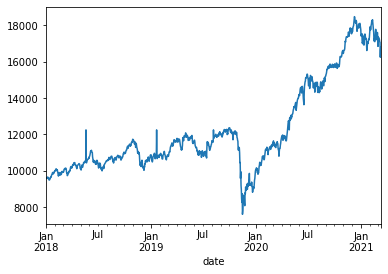

In [8]:
df['Adj Close'].plot()

In [11]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [45]:
test_result=adfuller(df['Adj Close'])

In [12]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(a):
    result=adfuller(a)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [13]:
adfuller_test(df['Adj Close'])

ADF Test Statistic : -0.40404232156414643
p-value : 0.9094216634702803
#Lags Used : 6
Number of Observations Used : 1160
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [14]:
df['NIFTY First Difference'] = df['Adj Close'] - df['Adj Close'].shift(1)

In [35]:
df['Seasonal First Difference']=df['Adj Close']-df['Adj Close'].shift(30)

In [15]:
df.head(14)

,DATE,Open,High,Low,Close,Adj Close,Volume,NIFTY First Difference
date,,,,,,,,
2018-01-01,1,9646.700195,9647.049805,9598.500000,9616.400391,9616.400391,141400.0,NaN
2018-01-02,2,9615.549805,9654.150391,9595.400391,9606.900391,9606.900391,129700.0,-9.500000
2018-01-03,3,9621.549805,9627.400391,9580.450195,9618.150391,9618.150391,181800.0,11.250000
2018-01-04,4,9617.900391,9621.400391,9560.799805,9578.049805,9578.049805,171100.0,-40.100586
2018-01-05,5,9595.450195,9615.849609,9565.500000,9588.049805,9588.049805,213200.0,10.000000
2018-01-06,6,9626.400391,9673.299805,9614.900391,9657.549805,9657.549805,141700.0,69.500000
2018-01-07,7,9670.500000,9676.500000,9643.750000,9653.500000,9653.500000,159500.0,-4.049805
2018-01-08,8,9648.099609,9650.450195,9608.599609,9633.599609,9633.599609,144000.0,-19.900391
2018-01-09,9,9642.650391,9698.849609,9617.750000,9630.000000,9630.000000,198800.0,-3.599609


In [32]:
## Again test dickey fuller test
adfuller_test(df['NIFTY First Difference'].dropna())

ADF Test Statistic : -14.018164643910612
p-value : 3.611354372326074e-26
#Lags Used : 5
Number of Observations Used : 1160
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='date'>

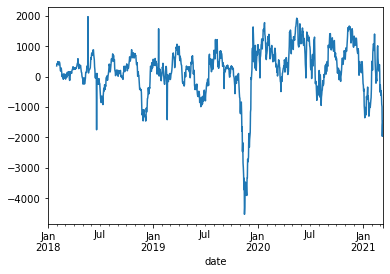

In [36]:
df['Seasonal First Difference'].plot()

<AxesSubplot:xlabel='date'>

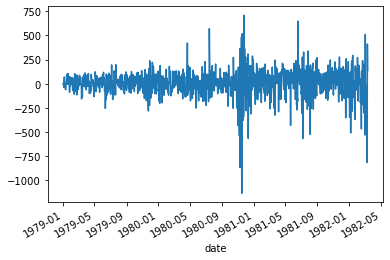

In [168]:
df['NIFTY First Difference'].plot()

## Auto Regressive Model
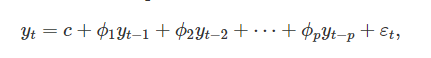

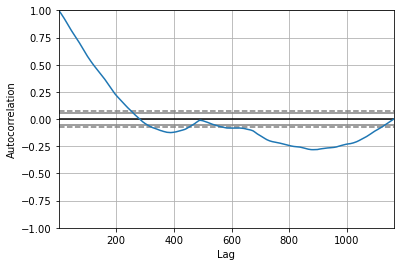

In [190]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Adj Close'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


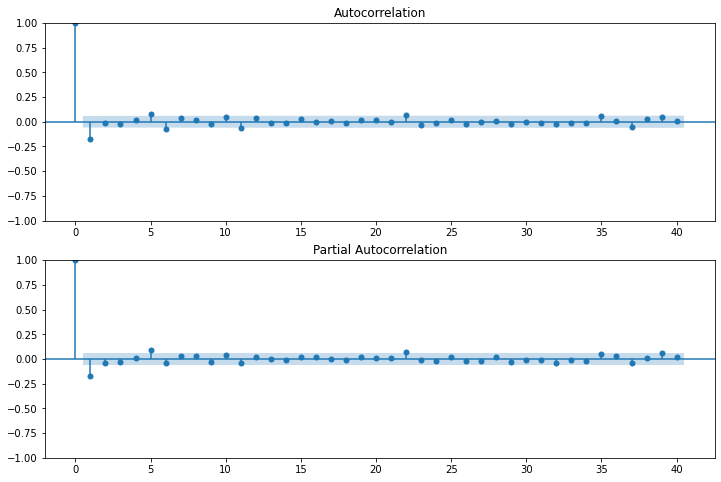

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['NIFTY First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['NIFTY First Difference'].iloc[13:],lags=40,ax=ax2)

In [33]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [293]:
model=ARIMA(df['Close'],order=(5,1,3))
model_fit=model.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [296]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1167
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -7612.831
Date:                Wed, 22 Jun 2022   AIC                          15243.663
Time:                        11:45:34   BIC                          15289.215
Sample:                    01-01-2018   HQIC                         15260.846
                         - 03-12-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5079      0.157     -3.233      0.001      -0.816      -0.200
ar.L2          0.3130      0.158      1.985      0.047       0.004       0.622
ar.L3          0.6155      0.180      3.418      0.001       0.263       0.968
ar.L4          0.1271      0.043      2.968      0.003       0.043       0.211
ar.L5          0.1204      0.028      4.345      0.000       0.066       0.175
ma.L1          0.3375      0.158      2.133      0.033       0.027       0.648
ma.L2         -0.4134      0.154     -2.676      0.007      -0.716      -0.111
ma.L3         -0.5925      0.174     -3.411      0.001      -0.933      -0.252
sigma2      2.772e+04    386.115     71.780      0.000     2.7e+04    2.85e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             30209.52
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.04
Prob(H) (two-sided):                  0.50   Kurtosis:                        27.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

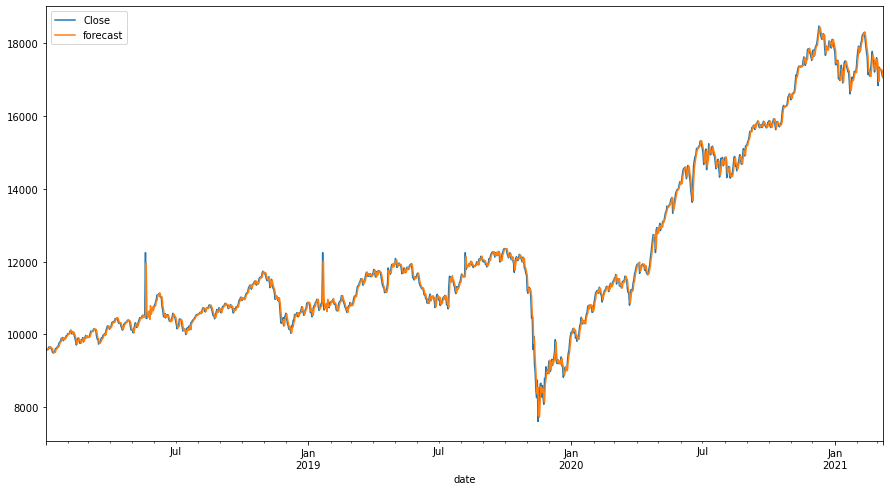

In [313]:
df['forecast']=model_fit.predict(start=1, end=1167)
df[['Close','forecast']].plot(figsize=(15,8))


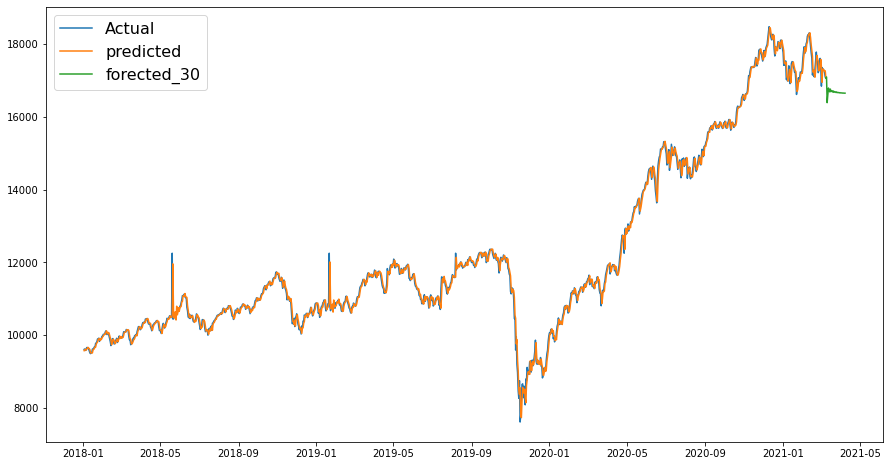

In [314]:
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(df['Adj Close'], label='Actual')
plt.plot(df['forecast'],label='predicted')
plt.plot(forecast_30, label='forected_30')
plt.legend(fontsize=16,loc ="upper left")
plt.show()

In [315]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(df['Close'],df['forecast']))

163.71780652073855

In [299]:
forecast_30=model_fit.predict(start=1163, end=1193)

<AxesSubplot:>

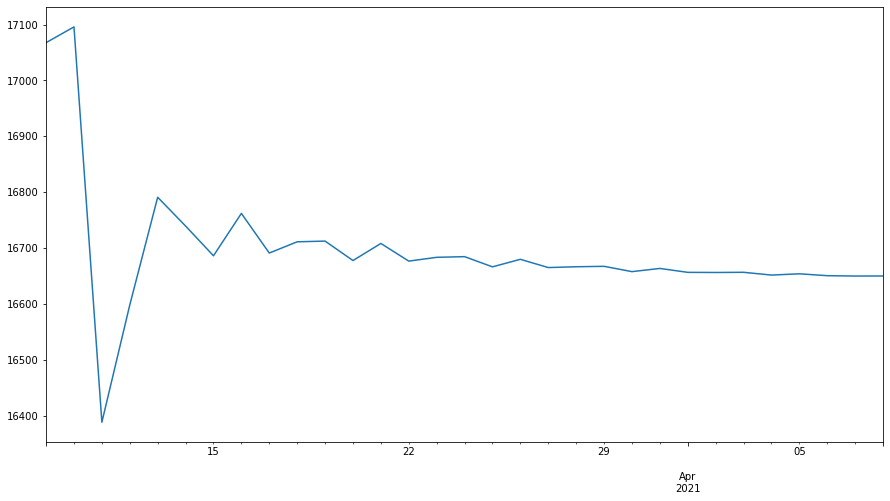

In [312]:
forecast_30.plot(figsize=(15,8))

In [132]:
# to install pmdarima library to run autoarima method
pip install pmdarima

In [133]:
# importing autoARIMA method from pmdarima library 
from pmdarima import auto_arima

In [250]:
step_wise_fit= auto_arima(df["Close"], trace= True, supress_warnings= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14714.737, Time=2.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14734.012, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14735.880, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14735.888, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14734.358, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14739.617, Time=0.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14739.714, Time=0.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14712.160, Time=2.53 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14740.070, Time=0.54 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=14705.256, Time=3.59 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=14737.088, Time=1.31 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=14705.098, Time=3.03 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=14714.592, Time=1.51 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=14702.869, Time=3.55 sec
 ARIMA(4,1,3)(0,0,0